In [1]:
# 궁금한 지역의 인구 데이터 출력하기 (numpy 활용)

import numpy as np
import csv
f = open('age.csv', encoding='utf-8')
data = csv.reader(f)
next(data)
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)를 입력해 주세요: ')
for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int)
print(home)

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)를 입력해 주세요: 신도림동
[311 331 344 388 397 407 396 432 414 394 409 398 372 350 362 328 333 357
 370 405 372 404 445 506 458 499 443 461 500 445 553 536 563 606 592 666
 759 755 811 696 749 666 685 625 680 690 674 626 642 629 572 527 490 523
 554 484 497 503 558 536 523 469 446 403 485 371 370 362 243 291 264 263
 272 160 161 146 166 177 140 110 112 105  86  97  57  53  40  43  30  24
  25  18  11  12  11   4   9   1   3   4   8]


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)를 입력해 주세요: 신도림동


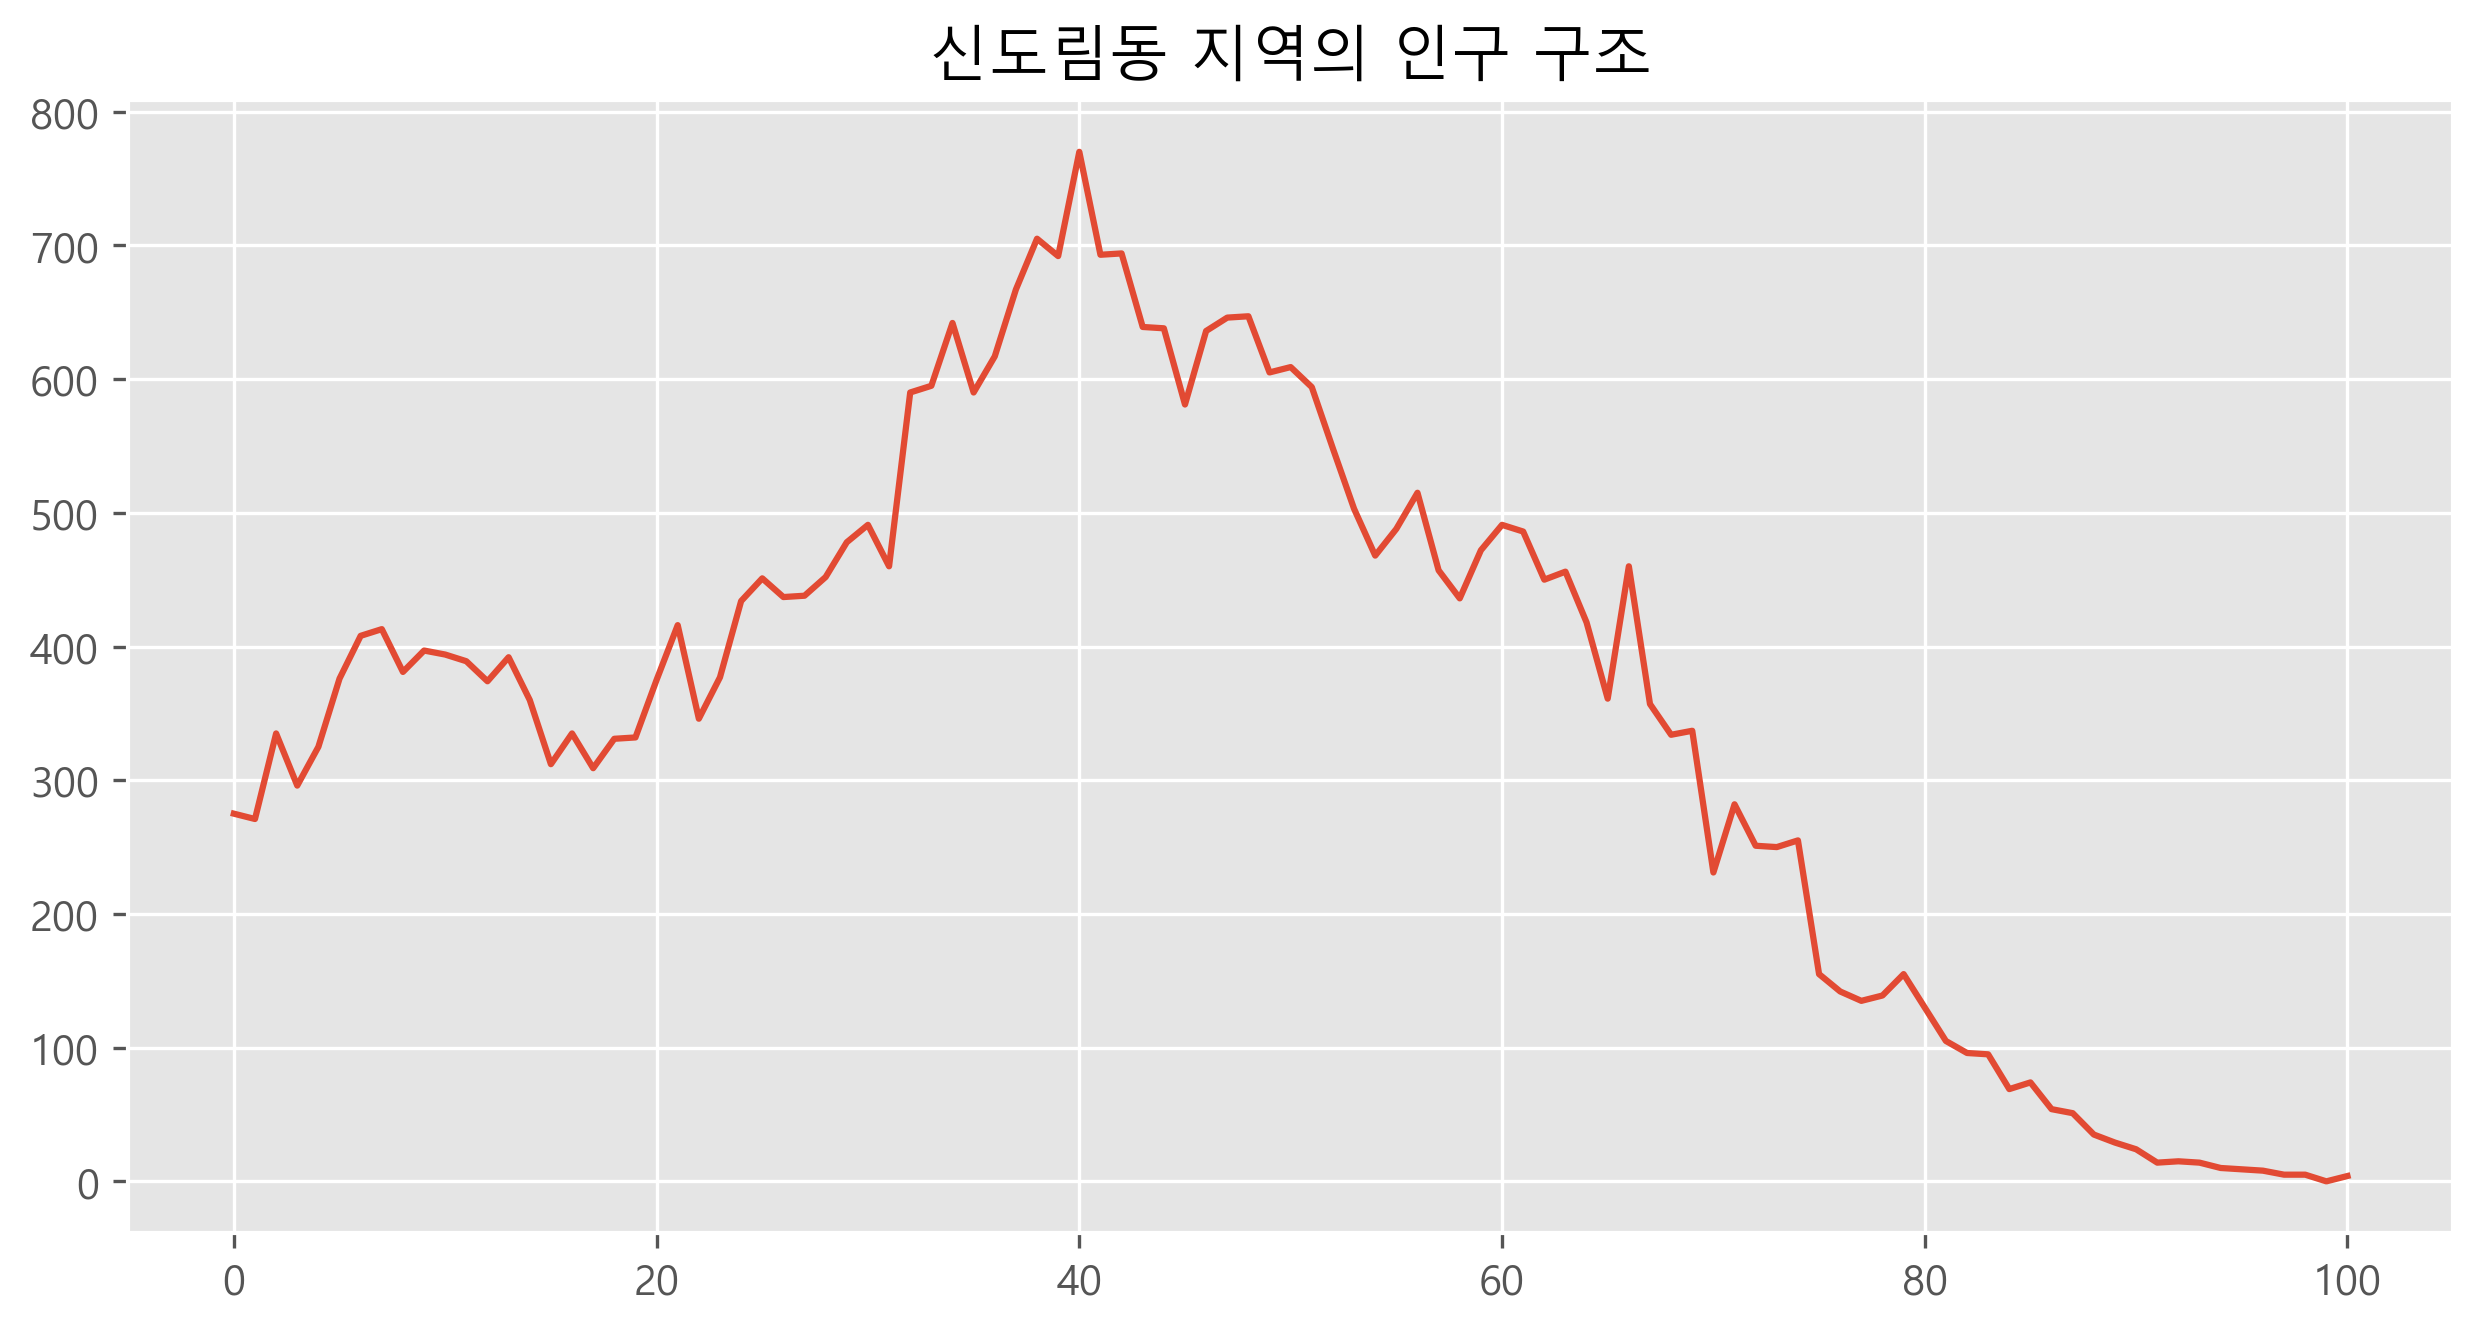

In [9]:
# 궁금한 지역의 인구 구조 시각화하기

import numpy as np
import csv
f = open('age.csv', encoding='utf-8')
data = csv.reader(f)
next(data)
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)를 입력해 주세요: ')
for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int)

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 5), dpi=300)
plt.title(name + ' 지역의 인구 구조')
plt.plot(home)
plt.show()

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요: 신도림동


<ipython-input-4-1ac130f08ddd>:25: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(row[3:], dtype=int) / int(row[2])


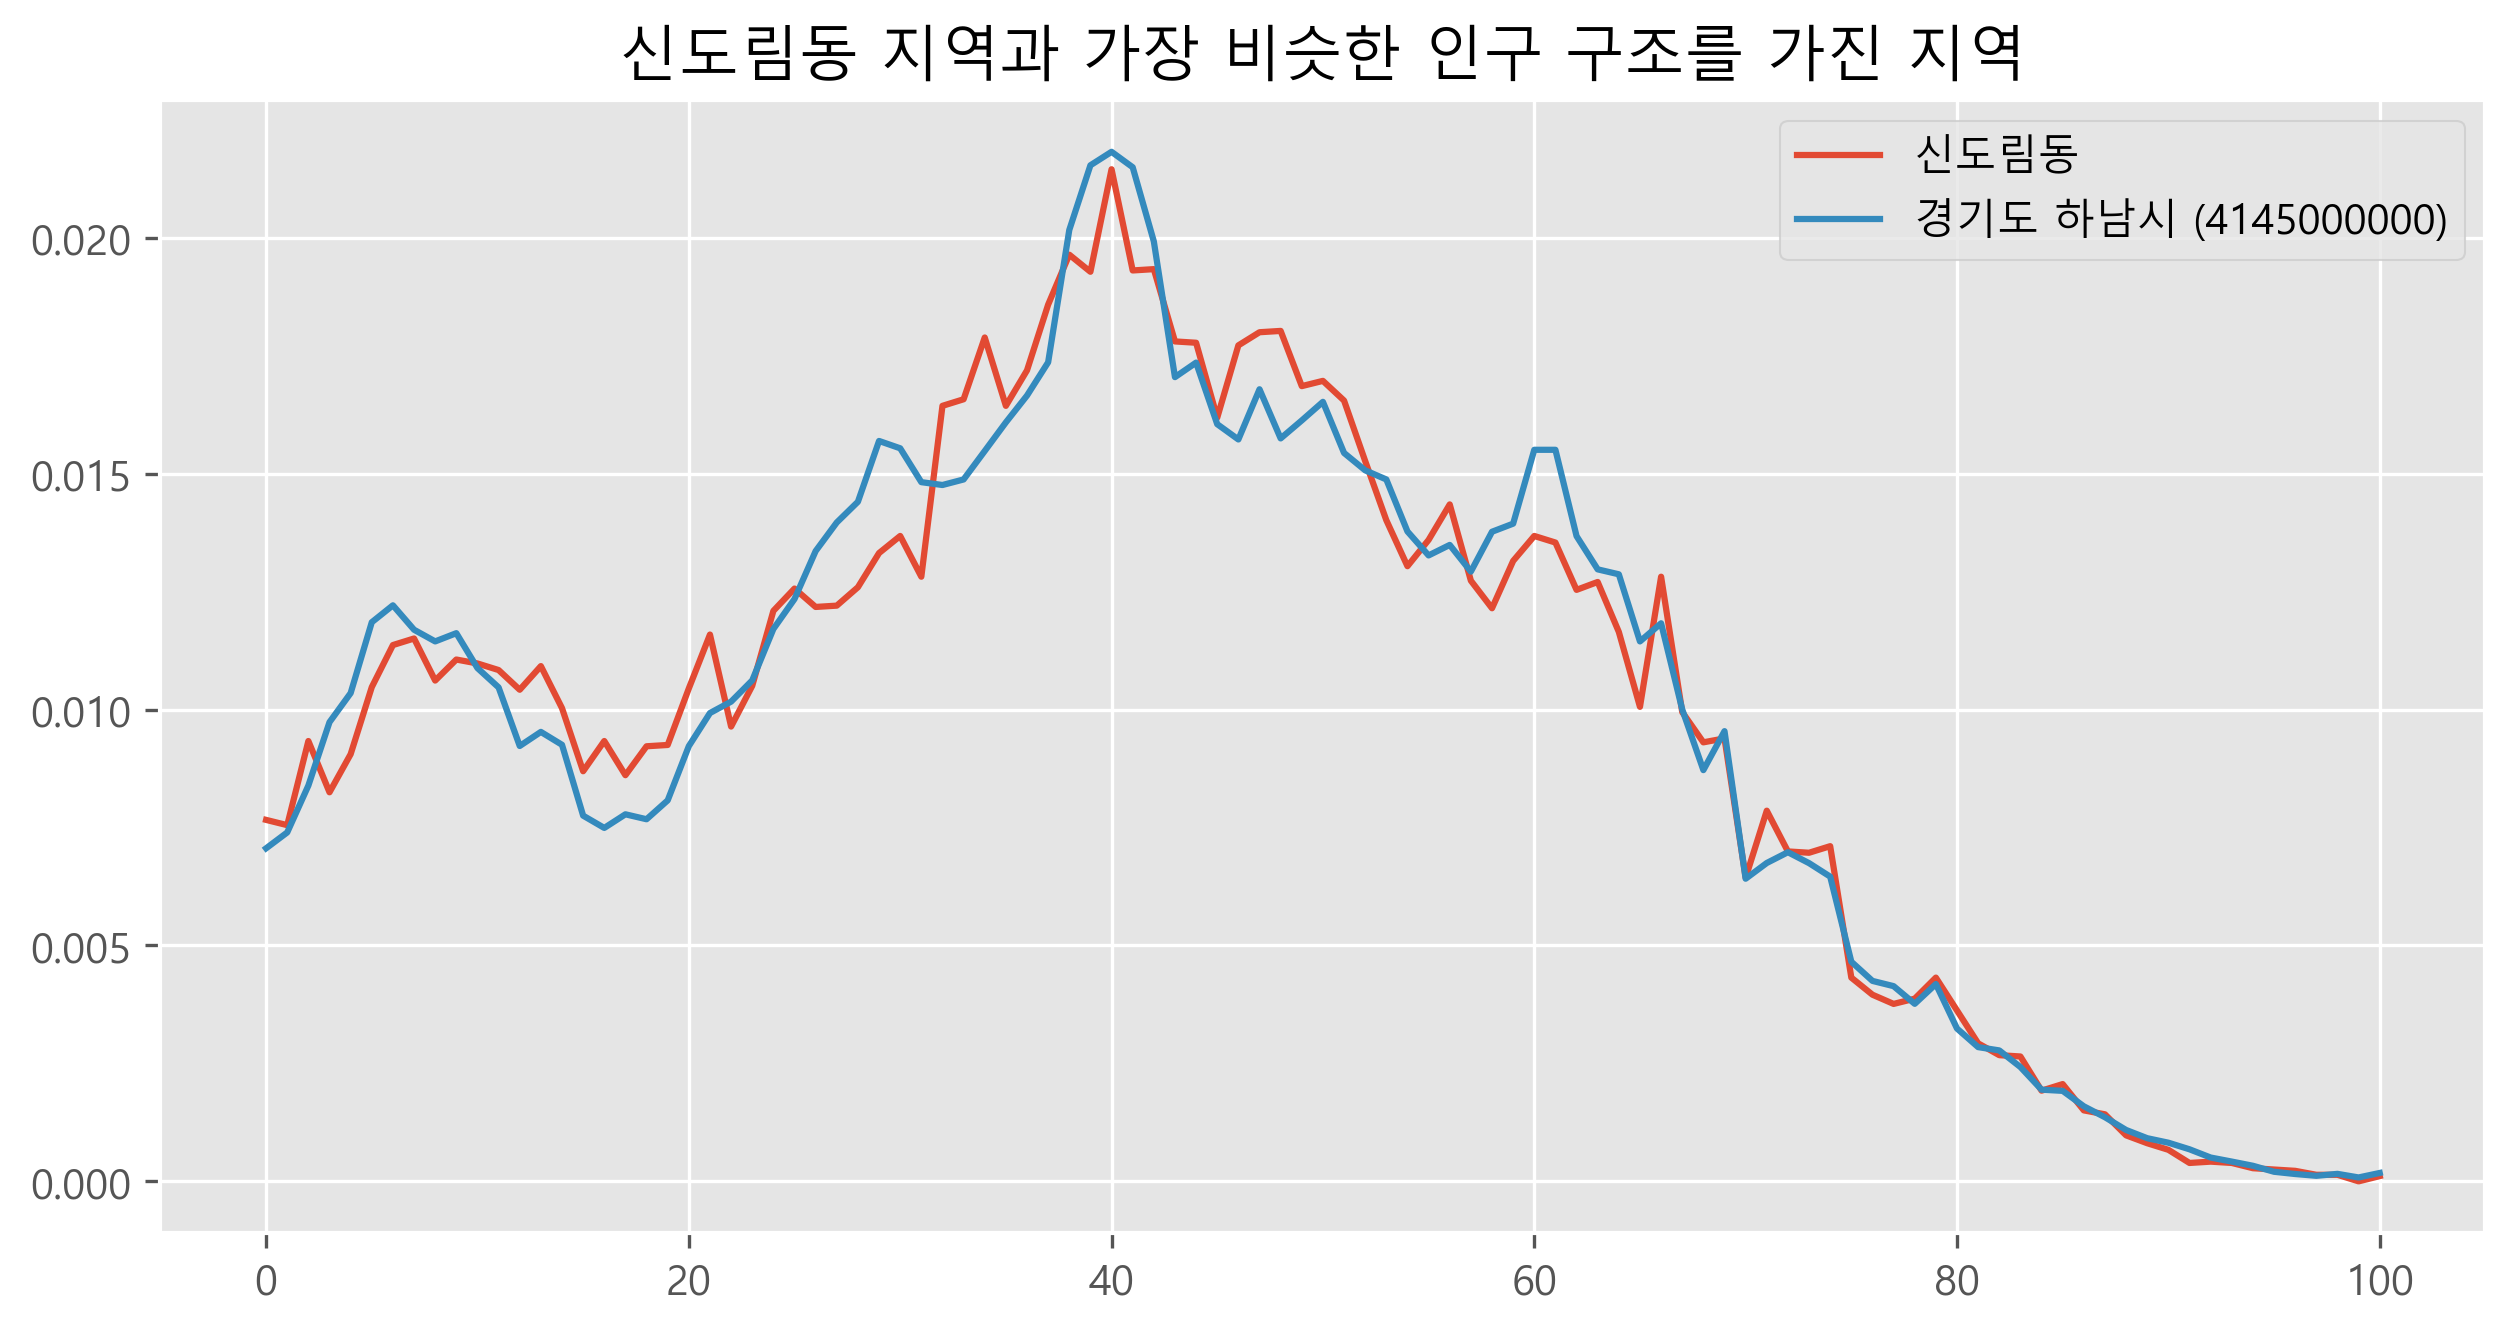

In [4]:
# 최종 코드

import numpy as np
import csv

# 1. 데이터를 읽어온다.
f = open('age.csv', encoding='utf-8')
data = csv.reader(f)
next(data)
data = list(data)

# 2. 궁금한 지역의 이름을 입력받는다.
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요: ')
mn = 1
result_name = ''
result = 0

# 3. 궁금한 지역의 인구 구조를 저장한다.
for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int) / int(row[2])
        
# 4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
for row in data:
    away = np.array(row[3:], dtype=int) / int(row[2])
    s = np.sum((home-away)**2)
    if s < mn and name not in row[0]:
        mn = s
        result_name = row[0]
        result = away
        
# 5. 궁금한 지역의 인구 구조와 가장 비슷한 곳의 인구 구조를 시각화한다.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 5), dpi=300)
plt.rc('font', family='Malgun Gothic')
plt.title(name + ' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()
plt.show()